Для реализации учебных целей работы с нейронными сетями  мной был найдет датасет для прогноза цен на подержанные автомобили. В качестве источника был использован ресурс Kaggle. 

Данные насчитывали 12 характеристик: 
name (марка и модель автомобиля), 
location (местоположение, в котором автомобиль продается),
year (год выпуска), 
kilom (общий пробег), 
fuel (тип топлива, используемого автомобилем: бензин, дизель, электричество), 
trans (тип трансмиссии: ручная/автомат), 
owner (владелец: первый/второй/+), 
mileage (стандартный пробег), 
engine (рабочий объем двигателя), 
power (максимальная мощность двигателя), 
seats (количество мест в машине), 
priceinr (цена подержанного автомобиля в INR).

Скачав файл, я перешла к его редактированию в Excel. Так как данные по некоторым переменным были представлены с единицами измерения, я провела их очистку; в исходном наборе результирующая переменная цены была записана рупиях, для удобства и лучшей ориентации рупия была переконвертирована в доллар; а также я удалила переменную location, посчитав ее бесполезой для дальнейшего анализа. После доведения данных до требуемуего формата, сохраняю файл в формате csv.

# Data Preprocessing

Сперва подключаю все необходимые для работы и предустановленные библиотеки, загружаю подготовленный в Excel файл.

In [646]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [647]:
# Importing the dataset
df = pd.read_csv('sr1.csv', sep=',')

Для наглядности выведем импортрованнные данные на экран; убедимся, что всё загрузилось должным образом. 

Итак, имеем 11 стобцов переменных по 6019 строк записей.

In [648]:
df

,name,year,kilom,fuel,trans,owner,mileage,engine,power,seats,pricedol
0,"Audi A4 3,2 FSI Tiptronic Quattro",2012,125000,Petrol,Automatic,First,10.50,3197.0,NaN,0.0,252000
1,Smart Fortwo CDI AT,2008,103000,Diesel,Automatic,Second,0.00,799.0,NaN,2.0,42000
2,"Audi TT 2,0 TFSI",2014,14262,Petrol,Automatic,First,9.90,1984.0,207.8,2.0,382900
3,"Audi TT 2,0 TFSI",2013,12100,Petrol,Automatic,First,9.90,1984.0,207.8,2.0,413000
4,Porsche Boxster S tiptronic,2015,10512,Petrol,Automatic,First,8.60,2706.0,265.0,2.0,896000
...,...,...,...,...,...,...,...,...,...,...,...
6014,BMW 5 Series 520d Sedan,2012,72000,Diesel,Automatic,Third,18.48,NaN,NaN,NaN,193900
6015,BMW 5 Series 520d Sedan,2012,90000,Diesel,Automatic,First,18.48,NaN,NaN,NaN,203000
6016,BMW 5 Series 520d Sedan,2014,64158,Diesel,Automatic,First,18.48,NaN,NaN,NaN,250460
6017,BMW 5 Series 520d Sedan,2012,95000,Diesel,Automatic,Second,18.48,NaN,NaN,NaN,252000


Выведем статистику по числовым переменным, где сразу увидим, что в переменных mileage, engine, power, seats,  имеются пропущенные значения.

In [649]:
df.describe()

,year,kilom,mileage,engine,power,seats,pricedol
count,6019.000000,6.019000e+03,6017.000000,5983.000000,5876.000000,5977.000000,6.019000e+03
mean,2013.358199,5.873838e+04,18.134961,1621.276450,113.253050,5.278735,1.327126e+05
std,3.269742,9.126884e+04,4.582289,601.355233,53.874957,0.808840,1.566308e+05
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,6.160000e+03
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,4.900000e+04
50%,2014.000000,5.300000e+04,18.150000,1493.000000,97.700000,5.000000,7.896000e+04
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,1.393000e+05
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,2.240000e+06


Проведем проверку типов данных по переменным и выявим соответствие.

In [650]:
df.dtypes

name         object
year          int64
kilom         int64
fuel         object
trans        object
owner        object
mileage     float64
engine      float64
power       float64
seats       float64
pricedol      int64
dtype: object

Следующим этапом подготовки данных будет проверка на наличие пропущенных значений.
Выведем общее количество и процент пропусков по переменным. Как было указано ранее, исходя из статистики, пропуски имееют   seats, power, engine, mileage.

In [651]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
power,143,0.023758
seats,42,0.006978
engine,36,0.005981
mileage,2,0.000332
pricedol,0,0.000000
owner,0,0.000000
trans,0,0.000000
fuel,0,0.000000
kilom,0,0.000000
year,0,0.000000


С помощью написанной ниже функции для числовых переменных заполняем пропуски средними значениями.

In [652]:
# Function Missing data (numeric)
def fill_missing_num(x):
    num_var = list(x._get_numeric_data().columns)
    for col_names in num_var:        
        prep_med = SimpleImputer(missing_values=np.nan, strategy='mean')
        prep_med.fit(x[num_var])
        x[num_var] = prep_med.transform(x[num_var])
    return(x)

Записываем в наш датафрейм уже очищенные данные.

In [653]:
# Filling NA 
from sklearn.impute import SimpleImputer
df = fill_missing_num(df)

Повторно делаем проверку, которая указывает на отсутствие пропусков в данных

In [654]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
pricedol,0,0.0
seats,0,0.0
power,0,0.0
engine,0,0.0
mileage,0,0.0
owner,0,0.0
trans,0,0.0
fuel,0,0.0
kilom,0,0.0
year,0,0.0


In [655]:
df.describe()

,year,kilom,mileage,engine,power,seats,pricedol
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6.019000e+03
mean,2013.358199,5.873838e+04,18.134961,1621.276450,113.253050,5.278735,1.327126e+05
std,3.269742,9.126884e+04,4.581528,599.553865,53.231019,0.806012,1.566308e+05
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,6.160000e+03
25%,2011.000000,3.400000e+04,15.170000,1198.000000,78.000000,5.000000,4.900000e+04
50%,2014.000000,5.300000e+04,18.150000,1493.000000,98.600000,5.000000,7.896000e+04
75%,2016.000000,7.300000e+04,21.100000,1969.000000,138.030000,5.000000,1.393000e+05
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,2.240000e+06


Построим графики распределения функций. Для асимметричных данных проведем логарифмирование:'engine','pricedol',"kilom","power".

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


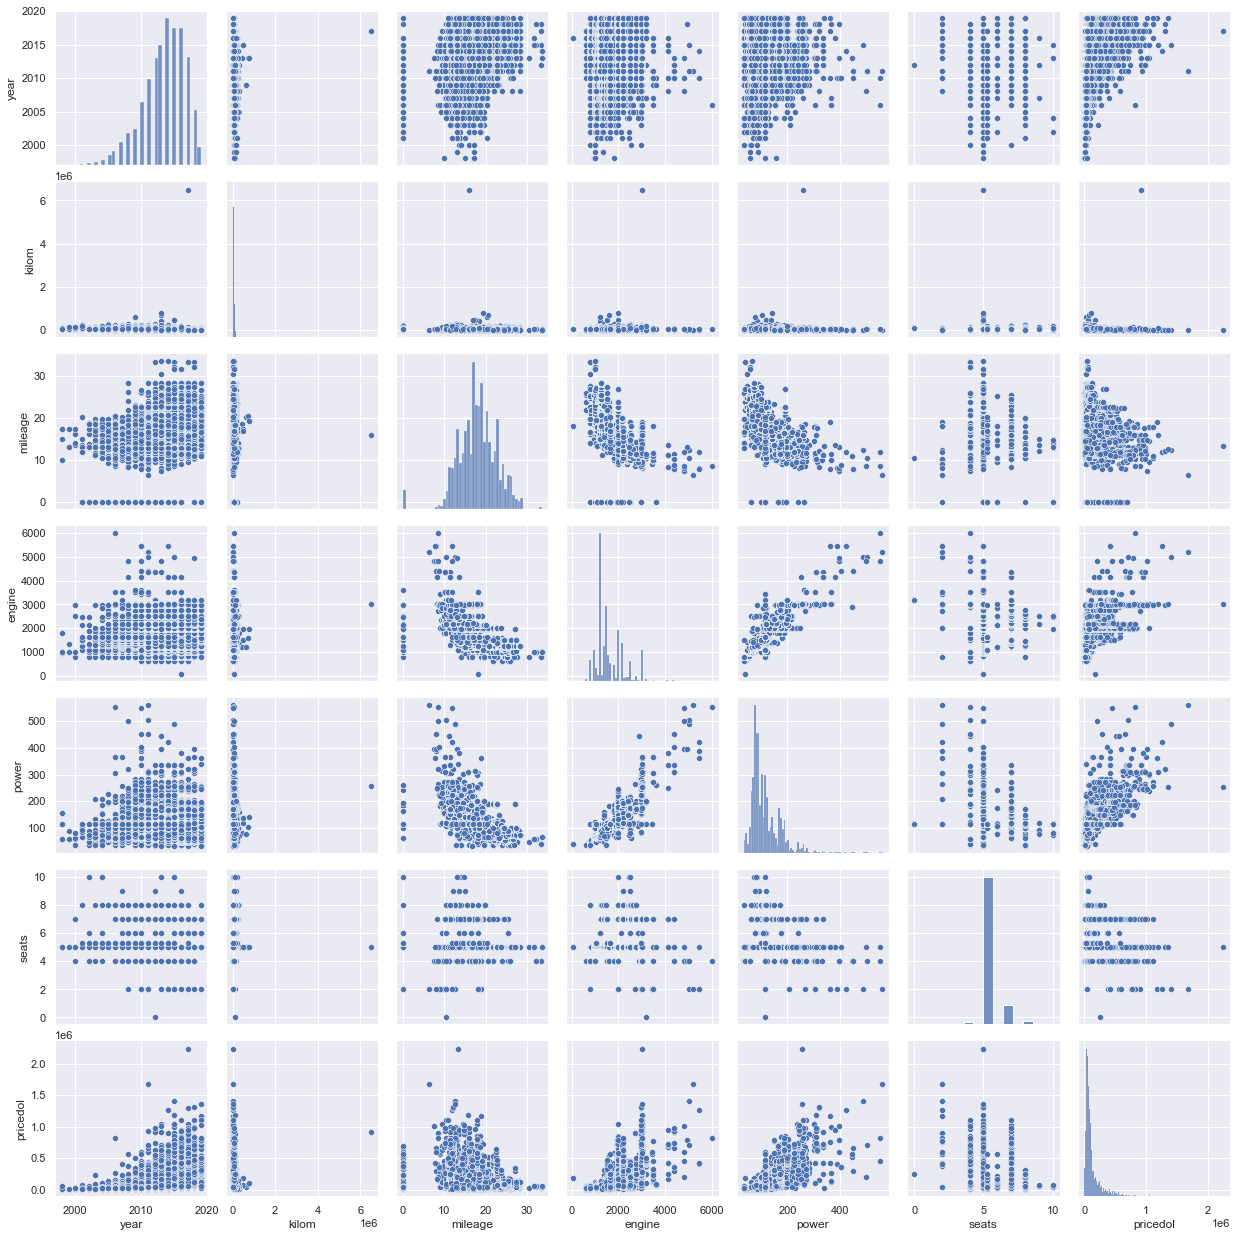

In [656]:
# Features distribution
import seaborn as sns
sns.set()
sns.pairplot(df, size = 2.5)
plt.show();

Произведем преобразование для искаженных распределений и продемонстрируем результат.

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


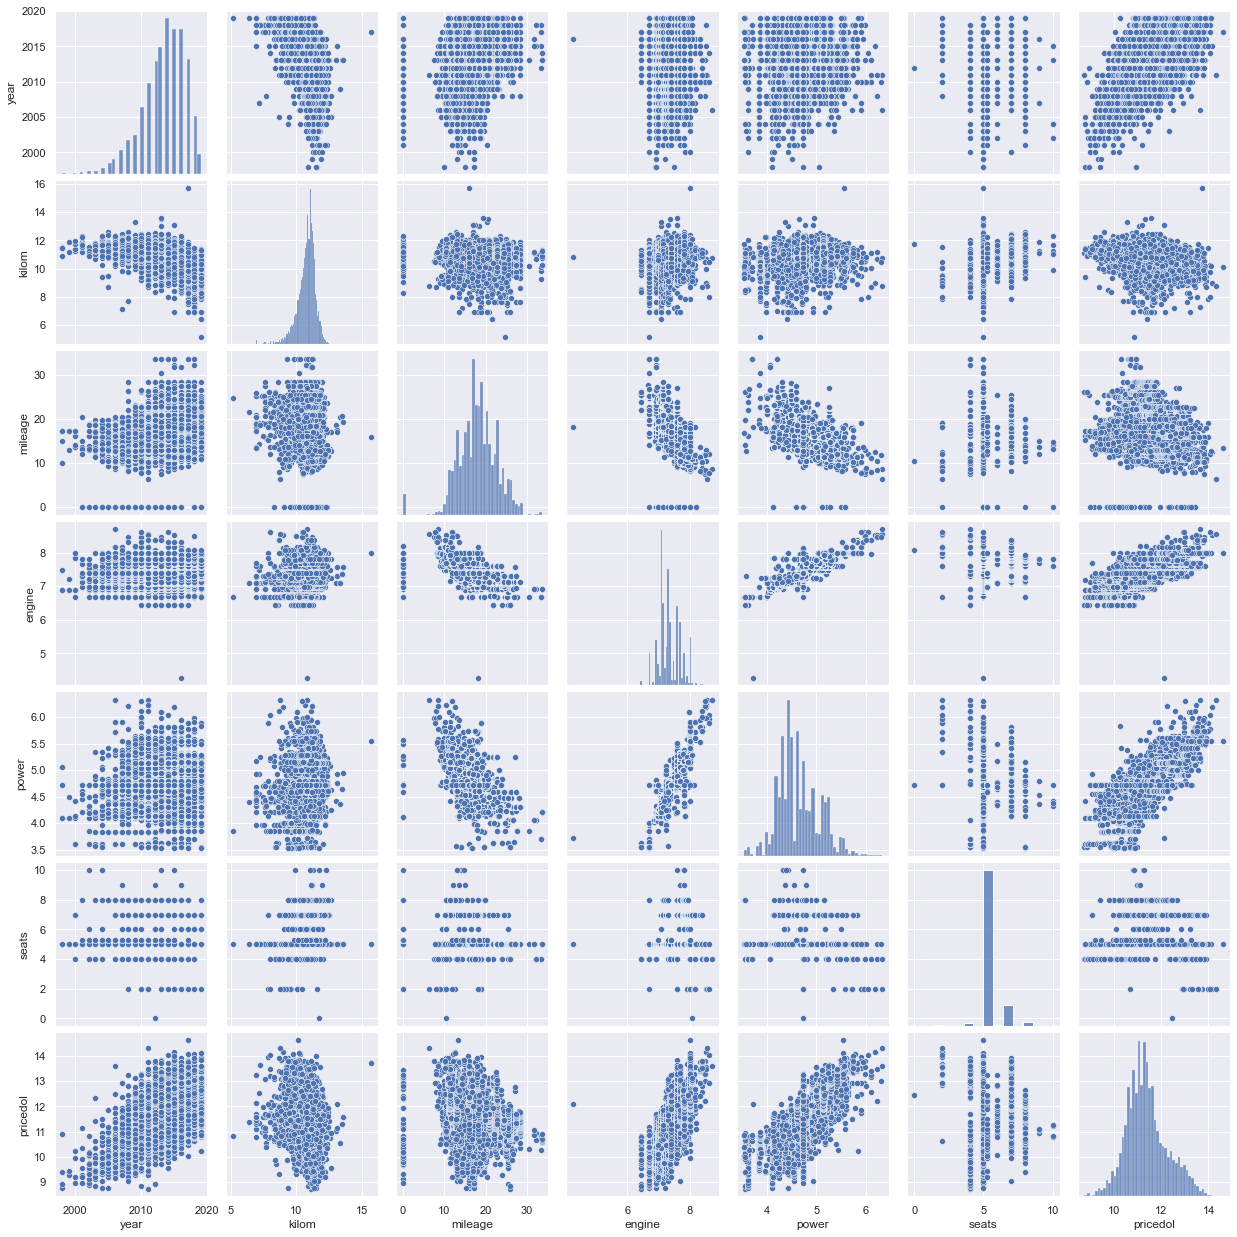

In [657]:
# Log Transformations for Skewed Distributions
df_1 = df.copy()
df_1[['engine','pricedol',"kilom","power"]] = np.log(df_1[['engine','pricedol',"kilom","power"]])
sns.set()
sns.pairplot(df_1, size = 2.5)
plt.show();

Осуществим работы с выбросами в числовых переменных: для этого запишем функцию для поиска и замены данных, выходящих за пределы 3 сигма. 

In [658]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

Запишем в наш датафрейм уже очищенные от  выбросов переменные и повторно выведем статистику.
В результате выполнения очистки можно наблядать, что показатели максимального, минимального, среднего значений, а также стандартного отклонения изменились практически по всем переменным и теперь соответствуют нормальному распределению.

In [659]:
# Outliers
df = outliers(df)
df.describe()

,year,kilom,mileage,engine,power,seats,pricedol
count,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.374555,57460.396307,18.181014,1615.392295,112.378122,5.271512,127652.041247
std,3.212293,35032.211954,4.393832,574.572565,49.287134,0.759818,132364.976260
min,2003.548973,171.000000,4.390378,72.000000,34.200000,2.860699,6160.000000
25%,2011.000000,34000.000000,15.170000,1198.000000,78.000000,5.000000,49000.000000
50%,2014.000000,53000.000000,18.150000,1493.000000,98.600000,5.000000,78960.000000
75%,2016.000000,73000.000000,21.100000,1969.000000,138.030000,5.000000,139300.000000
max,2019.000000,332544.909914,31.400380,3419.938045,272.946108,7.668249,602605.075626


Следующий шаг- кодирование категориальных переменных.
После выполнения представленной функции, записываем закодированные данные в датафрейм и выводим результат.

In [660]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [661]:
# Encoding categorical data
df = encoding_char(df)

In [662]:
df

,name,year,kilom,fuel,trans,owner,mileage,engine,power,seats,pricedol
0,0,2012.0,125000.0,0,0,0,10.500000,3197.00000,113.25305,2.860699,252000.000000
1,1,2008.0,103000.0,1,0,1,4.390378,799.00000,113.25305,2.860699,42000.000000
2,2,2014.0,14262.0,0,0,0,9.900000,1984.00000,207.80000,2.860699,382900.000000
3,2,2013.0,12100.0,0,0,0,9.900000,1984.00000,207.80000,2.860699,413000.000000
4,3,2015.0,10512.0,0,0,0,8.600000,2706.00000,265.00000,2.860699,602605.075626
...,...,...,...,...,...,...,...,...,...,...,...
6014,1874,2012.0,72000.0,1,0,2,18.480000,1621.27645,113.25305,5.278735,193900.000000
6015,1874,2012.0,90000.0,1,0,0,18.480000,1621.27645,113.25305,5.278735,203000.000000
6016,1874,2014.0,64158.0,1,0,0,18.480000,1621.27645,113.25305,5.278735,250460.000000
6017,1874,2012.0,95000.0,1,0,1,18.480000,1621.27645,113.25305,5.278735,252000.000000


Имеем подготовленный набор данных, который можно далее использовать для моделирования.

# Linear Regression

Следующий этап - моделирование.
Начнем с построения многофакторной линейной регрессии. Выведем корреляционную матрицу для визуализации и выявления наиболее значимых факторов, которые необходимо будет включить в модель. Как можно определить изначально, большее влияние имеет переменная power и engine.

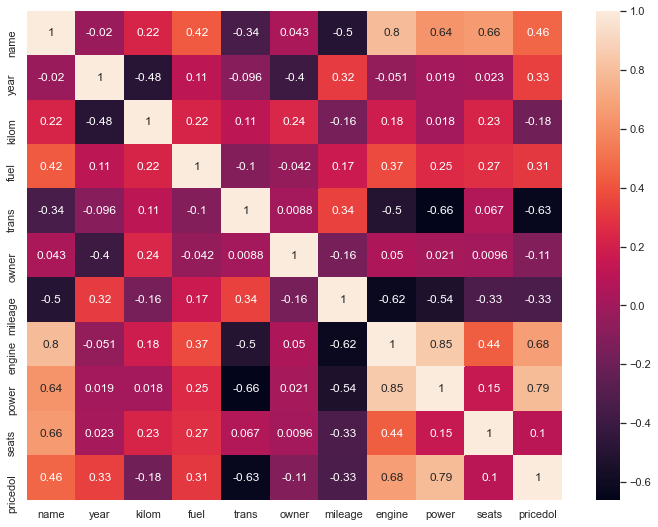

In [750]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

Поделим выборку на обучающую и тестовую (20%), запишем разделенные данные.

In [733]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, 10].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Построим модель многофакторной регрессии от всех переменных, включив константу, и выведем статистику по ней.

In [734]:
# Multiple Linear Regression, checking p-values
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
X = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X).fit()
#mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     1597.
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        05:31:38   Log-Likelihood:                -60135.
No. Observations:                4815   AIC:                         1.203e+05
Df Residuals:                    4804   BIC:                         1.204e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.407e+07    7.8e+05    -30.847      0.000   -2.56e+07   -2.25e+07
x1           -40.4024      3.616    -11.174      0.000     -47.491     -33.314
x2          1.196e+04    389.133     30.726      0.000    1.12e+04    1.27e+04
x3            -0.2618      0.034     -7.743      0.000      -0.328      -0.196
x4          3.794e+04   2334.047     16.254      0.000    3.34e+04    4.25e+04
x5         -4.215e+04   2860.261    -14.738      0.000   -4.78e+04   -3.65e+04
x6         -1675.7040   2219.832     -0.755      0.450   -6027.592    2676.184
x7         -2616.0190    348.881     -7.498      0.000   -3299.986   -1932.052
x8            37.6901      4.411      8.545      0.000      29.043      46.337
x9          1557.5057     45.836     33.980      0.000    1467.646    1647.366
x10         -690.7872   1972.204     -0.350      0.726   -4557.210    3175.636
==============================================================================
Omnibus:                      944.886   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5026.324
Skew:                           0.837   Prob(JB):                         0.00
Kurtosis:                       7.717   Cond. No.                     5.63e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Как показывает статистика,значимыми являются все переменные модели кроме "owner" и "seats". Коэффициент детерминации довольно высокий, модель значимая. 

Были поведены модификации исходной модели путем исключения/добавления факторов, незначительно точнее исходной вышла модель по 8 переменным.

Cтроим оптимальную модель, включая значимые факторы. 

In [735]:
X_train = X_train[:, [0,1, 2, 3, 4, 6, 7, 8]]
X_test = X_test[:, [0,1, 2, 3, 4, 6, 7, 8]]

In [736]:
# Fitting Optimized Multiple Regression to the Training set
from sklearn.linear_model import LinearRegression
mr = LinearRegression().fit(X_train, y_train)

Получаем коэффициенты регрессии:

In [737]:
# Getting parameters
mr.coef_, mr.intercept_

(array([-4.11520475e+01,  1.20151659e+04, -2.64241712e-01,  3.79551195e+04,
        -4.23233056e+04, -2.59089414e+03,  3.74625474e+01,  1.56301301e+03]),
 -24192082.534666337)

Строим прогноз на тестовых значениях:

In [738]:
# Predicting the Test set results
y_pred = mr.predict(X_test)

Вычисляем коэффициент детерминации, видим, что на тестовых значениях он немного ниже.

In [739]:
# Coefficient of determination R^2
mr.score(X_train, y_train), mr.score(X_test, y_test)

(0.7687312857321635, 0.7388498473578113)

Находим среднеквадратическое отклонение (т.к. число слишком большое, извлекаем корень), которое на тестовых значениях слегка превышает, что говорит о том, что модель немного переобучилась.

In [740]:
# Mean squared error
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, mr.predict(X_train))), math.sqrt(mean_squared_error(y_test, y_pred))

(64230.06731386877, 64935.018042817275)

Строим график по наиболее значимой переменной для визуализации результата. Видим, что предсказание работает не идеально, однако имеет свою точность.

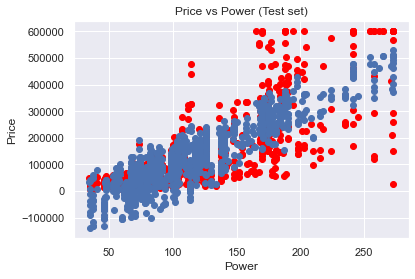

In [741]:
# Visualising the Test set results
plt.scatter(X_test[:,7], y_test, color = 'red')
plt.plot(X_test[:,7], mr.predict(X_test), 'bo')
plt.title('Price vs Power (Test set)')
plt.xlabel('Power')
plt.ylabel('Price')
plt.show()

Итак, мы получили базовую модель, от которой мы будем отталкиваться и ориентирваться в ходе посроения модели нейроной сети.

# Regression Neural Network

Наконец переходим к моделированию нейронной сети.

Для начала произведем шкалирование данных, использя выборку train оценим параметры, затем преобразуем обучающую и тестовую выборки.

In [742]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(np.array([[i] for i in y_train]))
y_train = sc_y.transform(np.array([[i] for i in y_train]))
y_test = sc_y.transform(np.array([[i] for i in y_test]))

Подключим библиотеки, необходимые для работы с нейронными сетями.

In [743]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Создаем последовательную нейронную сеть: Добавляем к ней слои, размерность входного слоя равна 8 (в соответствии с переменными предыдущей модели), число нейронов на выходном слое задаем равным 16, так как модель расширяющаяся, функция активации на первом слое-гиперболический тангенс. На втором слое количество нейронов оставляем равным 16, та же функция активации. На последнем слое используем линейную функцию активации.

In [744]:
# Initialising the ANN
rnn = Sequential()

# Adding the input layer and the first hidden layer
rnn.add(Dense(output_dim = 16, activation = 'tanh', input_dim = 8))

# Adding the second hidden layer
rnn.add(Dense(output_dim = 16, activation = 'tanh'))

# Adding the output layer
rnn.add(Dense(output_dim = 1, activation = 'linear'))

# Compiling the ANN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", input_dim=8, units=16)`
  """
C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", units=16)`
  
C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  # This is added back by InteractiveShellApp.init_path()


Обучаем модель партиями по 8 объектов в течении 100 эпох.

In [745]:
# Fitting the ANN to the Training set
rnn.fit(X_train, y_train, batch_size = 8, nb_epoch = 100)

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
4815/4815 [==============================] - 3s 526us/step - loss: 0.2875 - accuracy: 0.0000e+00
Epoch 2/100
4815/4815 [==============================] - 2s 402us/step - loss: 0.1873 - accuracy: 0.0000e+00
Epoch 3/100
4815/4815 [==============================] - 2s 383us/step - loss: 0.1554 - accuracy: 0.0000e+00
Epoch 4/100
4815/4815 [==============================] - 2s 385us/step - loss: 0.1387 - accuracy: 0.0000e+00
Epoch 5/100
4815/4815 [==============================] - 2s 343us/step - loss: 0.1276 - accuracy: 0.0000e+00
Epoch 6/100
4815/4815 [==============================] - 2s 348us/step - loss: 0.1223 - accuracy: 0.0000e+00
Epoch 7/100
4815/4815 [==============================] - 2s 352us/step - loss: 0.1176 - accuracy: 0.0000e+00
Epoch 8/100
4815/4815 [==============================] - 2s 408us/step - loss: 0.1155 - accuracy: 0.0000e+00
Epoch 9/100
4815/4815 [==============================] - 2s 471us/step - loss: 0.1125 - accuracy: 0.0000e+00
Epoch 10/100
4815/4

4815/4815 [==============================] - 2s 362us/step - loss: 0.0796 - accuracy: 0.0000e+00
Epoch 75/100
4815/4815 [==============================] - 2s 351us/step - loss: 0.0787 - accuracy: 0.0000e+00
Epoch 76/100
4815/4815 [==============================] - 1s 275us/step - loss: 0.0799 - accuracy: 0.0000e+00
Epoch 77/100
4815/4815 [==============================] - 1s 242us/step - loss: 0.0805 - accuracy: 0.0000e+000s - loss: 0.0780 - 
Epoch 78/100
4815/4815 [==============================] - 1s 231us/step - loss: 0.0793 - accuracy: 0.0000e+00
Epoch 79/100
4815/4815 [==============================] - 1s 218us/step - loss: 0.0782 - accuracy: 0.0000e+00
Epoch 80/100
4815/4815 [==============================] - 1s 210us/step - loss: 0.0790 - accuracy: 0.0000e+00
Epoch 81/100
4815/4815 [==============================] - 1s 227us/step - loss: 0.0791 - accuracy: 0.0000e+00
Epoch 82/100
4815/4815 [==============================] - 1s 208us/step - loss: 0.0784 - accuracy: 0.0000e+00
Epo

Строим прогноз на тестовом множестве.

In [746]:
# Predicting the Test set results
y_pred = rnn.predict(X_test)

Осуществляем обратное шкалирование

In [747]:
# Inversing scaling
#yhat = pd.DataFrame(yhat, columns=['yhat']) 
from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

Вычмслим сумму квадратов ошибок на тестовом множестве.

In [748]:
# Mean squared error
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test, y_hat))

39293.333237903986

Видим, что MSE в модели нейронной сети (39293.33) значительно сократилась по сравнения с моделью регрессии (64935.018).

Построим график, на котором видно, что построенная модель нейронной сети сработала довольно четко по сравнению с многофакторной регрессией.

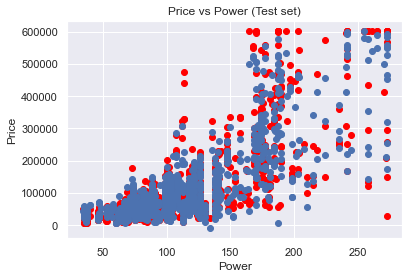

In [749]:
# Visualising the Test set results
plt.scatter(X_test[:,7], y_test, color = 'red')
plt.plot(X_test[:,7], y_hat, 'bo')
plt.title('Price vs Power (Test set)')
plt.xlabel('Power')
plt.ylabel('Price')
plt.show()

В итоге имеем качественный результат работы НС, который во много раз лучше базовой модели.